In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data preprocessing


Pre-processing refers tothe transformations applied to our data before feeding 
it to the algorithm. Data Preprocessing is a technique that is used to convert the
raw data into a clean data set. In other words, whenever the data is gathered from 
different sources it is collected in raw format which is notfeasible for the analysis.

In [2]:
df = pd.read_csv(r"C:\Users\ACER\Downloads\2020_NFL_COMBINE.csv")

In [5]:
df.head()

,Unnamed: 0,Week,Day,Date,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,...,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
0,0,1,Sun,13-Sep,L,Arizona Cardinals,20.0,24.0,18.0,366.0,...,NaN,29.0,404.0,224.0,180.0,1.0,3.88,-6.46,0.46,San Francisco 49ers
1,1,2,Sun,20-Sep,W,New York Jets,31.0,13.0,17.0,359.0,...,1.0,17.0,277.0,173.0,104.0,NaN,11.40,4.92,0.86,San Francisco 49ers
2,2,3,Sun,27-Sep,W,New York Giants,36.0,9.0,29.0,420.0,...,NaN,13.0,231.0,165.0,66.0,3.0,18.53,10.86,-8.05,San Francisco 49ers
3,3,4,Sun,4-Oct,L,Philadelphia Eagles,20.0,25.0,25.0,417.0,...,3.0,18.0,267.0,174.0,93.0,1.0,0.02,-0.66,-3.75,San Francisco 49ers
4,4,5,Sun,11-Oct,L,Miami Dolphins,17.0,43.0,19.0,259.0,...,3.0,22.0,436.0,342.0,94.0,NaN,-9.48,-19.36,-0.03,San Francisco 49ers


In [6]:
# Display names of all categorical and numeric columns
categorical_df = df.select_dtypes(include='object')
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)

print("Categorical columns:")
for (columnName, columnData) in categorical_df.iteritems():
    print(columnName)
print()

print("Numeric columns:")
for (columnName, columnData) in numeric_df.iteritems():
    print(columnName)

Categorical columns:
Week
Day
Date
Unnamed: 5
Opp
Home_team

Numeric columns:
Unnamed: 0
Tm
Opp.1
1stD
TotYd
PassY
RushY
TO
1stD.1
TotYd.1
PassY.1
RushY.1
TO.1
Offense
Defense
Sp. Tms


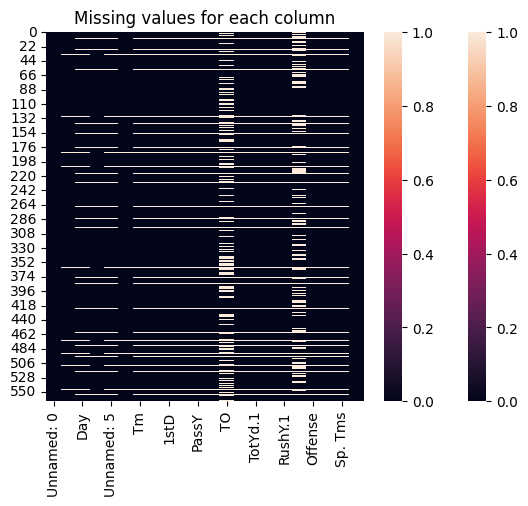

In [7]:
# Heat map for missing values in dataset
sns.heatmap(df.isnull())
plt.title("Missing values for each column")
sns.heatmap(df.isnull())
plt.show()

In [8]:
# Find number of outliers in each numeric column and remove them
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)

print("For numeric columns only:\n")
for (columnName, columnData) in numeric_df.iteritems():
    avg = columnData.mean()
    std_dev = columnData.std()
    print('Column Name : ', columnName)
    print('Number of Outliers : ',((columnData < (avg - 2 * std_dev)) |(columnData > (avg + 2 * std_dev))).sum())
    print("-----------------------------")

For numeric columns only:

Column Name :  Unnamed: 0
Number of Outliers :  0
-----------------------------
Column Name :  Tm
Number of Outliers :  25
-----------------------------
Column Name :  Opp.1
Number of Outliers :  24
-----------------------------
Column Name :  1stD
Number of Outliers :  23
-----------------------------
Column Name :  TotYd
Number of Outliers :  24
-----------------------------
Column Name :  PassY
Number of Outliers :  20
-----------------------------
Column Name :  RushY
Number of Outliers :  27
-----------------------------
Column Name :  TO
Number of Outliers :  24
-----------------------------
Column Name :  1stD.1
Number of Outliers :  25
-----------------------------
Column Name :  TotYd.1
Number of Outliers :  24
-----------------------------
Column Name :  PassY.1
Number of Outliers :  20
-----------------------------
Column Name :  RushY.1
Number of Outliers :  27
-----------------------------
Column Name :  TO.1
Number of Outliers :  27
------------

In [9]:
# Remove all the outliers
avg = numeric_df.mean()
std_dev = numeric_df.std()
outlier_df = ((numeric_df < (avg - 2 * std_dev)) |(numeric_df > (avg + 2 * std_dev)))

final_df = pd.concat([categorical_df, outlier_df], axis=1)
outliers_in_rows = []
for index,row in outlier_df.iterrows():
    outliers_in_rows.append(row.sum())
    
# creating new column with the name value
final_df['value'] = outliers_in_rows
final_df_without_outliers= final_df.loc[final_df['value'] == 0]

final_df_outliers = final_df.loc[final_df['value'] != 0]
arr = []
for i,r in final_df_outliers.iterrows():
    arr.append(i)
df_without_outliers = df.drop(df.index[arr])

df_without_outliers.head() # Use 'df_without_outliers' to display entire file

,Unnamed: 0,Week,Day,Date,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,...,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
0,0,1,Sun,13-Sep,L,Arizona Cardinals,20.0,24.0,18.0,366.0,...,NaN,29.0,404.0,224.0,180.0,1.0,3.88,-6.46,0.46,San Francisco 49ers
1,1,2,Sun,20-Sep,W,New York Jets,31.0,13.0,17.0,359.0,...,1.0,17.0,277.0,173.0,104.0,NaN,11.40,4.92,0.86,San Francisco 49ers
2,2,3,Sun,27-Sep,W,New York Giants,36.0,9.0,29.0,420.0,...,NaN,13.0,231.0,165.0,66.0,3.0,18.53,10.86,-8.05,San Francisco 49ers
3,3,4,Sun,4-Oct,L,Philadelphia Eagles,20.0,25.0,25.0,417.0,...,3.0,18.0,267.0,174.0,93.0,1.0,0.02,-0.66,-3.75,San Francisco 49ers
4,4,5,Sun,11-Oct,L,Miami Dolphins,17.0,43.0,19.0,259.0,...,3.0,22.0,436.0,342.0,94.0,NaN,-9.48,-19.36,-0.03,San Francisco 49ers


In [10]:
# Find the attributes with the highest correlation coefficients
dataCorr = df_without_outliers.corr()
dataCorrSorted = dataCorr.unstack().sort_values(ascending = False)
print("List of columns with correlation coefficients in descending order:\n")
print(dataCorrSorted)

List of columns with correlation coefficients in descending order:

Unnamed: 0  Unnamed: 0    1.000000
Tm          Tm            1.000000
Defense     Defense       1.000000
Offense     Offense       1.000000
TO.1        TO.1          1.000000
                            ...   
Defense     1stD.1       -0.638584
            TotYd.1      -0.662526
TotYd.1     Defense      -0.662526
Defense     Opp.1        -0.775189
Opp.1       Defense      -0.775189
Length: 256, dtype: float64


In [20]:
# Find the attributes with the highest correlation coefficients
dataCorr = df_without_outliers.corr()
dataCorrSorted = dataCorr.unstack().sort_values(ascending = False)
print("List of columns with correlation coefficients in descending order:\n")
print(dataCorrSorted)

List of columns with correlation coefficients in descending order:

Unnamed: 0  Unnamed: 0    1.000000
Tm          Tm            1.000000
Defense     Defense       1.000000
Offense     Offense       1.000000
TO.1        TO.1          1.000000
                            ...   
Defense     1stD.1       -0.638584
            TotYd.1      -0.662526
TotYd.1     Defense      -0.662526
Defense     Opp.1        -0.775189
Opp.1       Defense      -0.775189
Length: 256, dtype: float64


In [45]:
NA_val = df_without_outliers.isna().sum();
def na_filter(na, threshold = .4):
    col_pass = []
    for i in na.keys():
        if na[i]/df_without_outliers.shape[0] < threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df_without_outliers[na_filter(NA_val)]
duplicate = df_cleaned.duplicated();
df_cleaned.drop_duplicates(inplace=True);
dp1=df_cleaned.duplicated();

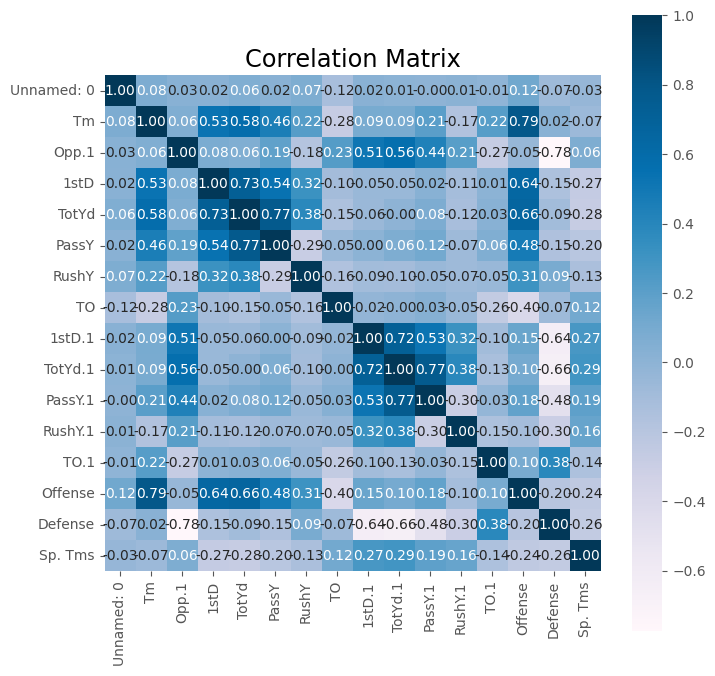

In [46]:
dataCorr = df_cleaned.corr()
plt.figure(figsize=(8,8))
plt.title('Correlation Matrix', fontsize="xx-large")
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'PuBu')
plt.show()

In [42]:
# Normalise columns suicides_no and population
col = ['suicides_no', 'population']
data = df_cleaned[col]
s = data.values.astype(float)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
s_scaled = min_max_scaler.fit_transform(s)
df_normalized = pd.DataFrame(s_scaled, columns=col,index=df_cleaned.index)
df_normalized = df_normalized.rename(columns={'suicides_no':'n_suicides_no', 'population':'n_population'})
df_cleaned = pd.concat([df_cleaned, df_normalized],axis=1)
df_cleaned.head() # Use 'df_cleaned' to display entire file

In [13]:
# DATA VISUALISATION

The process of finding trends and correlations in our data by representing it pictorially is called Data Visualization. 
To perform data visualization in python, we can use various python data visualization modules
such as Matplotlib, Seaborn, Plotly

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Defense', ylabel='Density'>

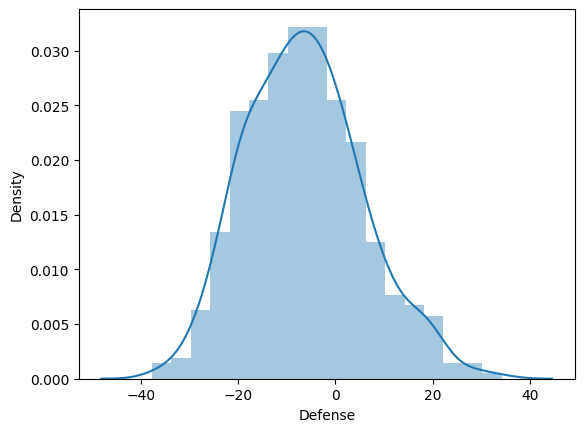

In [26]:
sns.distplot(df['Defense'])

<AxesSubplot:>

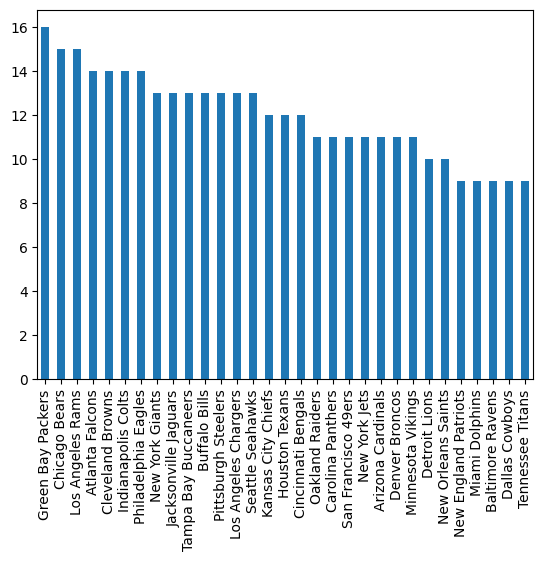

In [27]:
# Barplot 
df_cleaned['Home_team'].value_counts().plot(kind = 'bar')

In [43]:
#HYPOTHESIS TESTING

Hypothesis testing is a statistical method that is used in making statistical decisions using 
experimental data. Hypothesis Testing is basically an assumption that we make about the population parameter.

Hypothesis testing is an essential procedure in statistics. A hypothesis test evaluates two mutually exclusive
statements about a population to determine which statement is best supported by the sample data. When we say that
a finding is statistically significant, it’s thanks to a hypothesis test.

In [48]:
%matplotlib inline
import scipy.stats as stats
import math

In [58]:
population = df_cleaned['1stD'].values
population.mean()

nan

In [59]:
np.random.seed(10)
sample = np.random.choice(a = population, size = 1000)
print(sample.mean())
population.mean()-sample.mean()

nan


nan

In [60]:
sample1 = df_cleaned[df_cleaned['Home_team'] == 'New York Jets']['1stD'].values
sample2 = df_cleaned[df_cleaned['Home_team'] == 'New York Giants']['1stD'].values

In [61]:
df_cleaned.dropna(inplace=True)

In [62]:
stats.ttest_ind(a = sample1, b = sample2, equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

nan


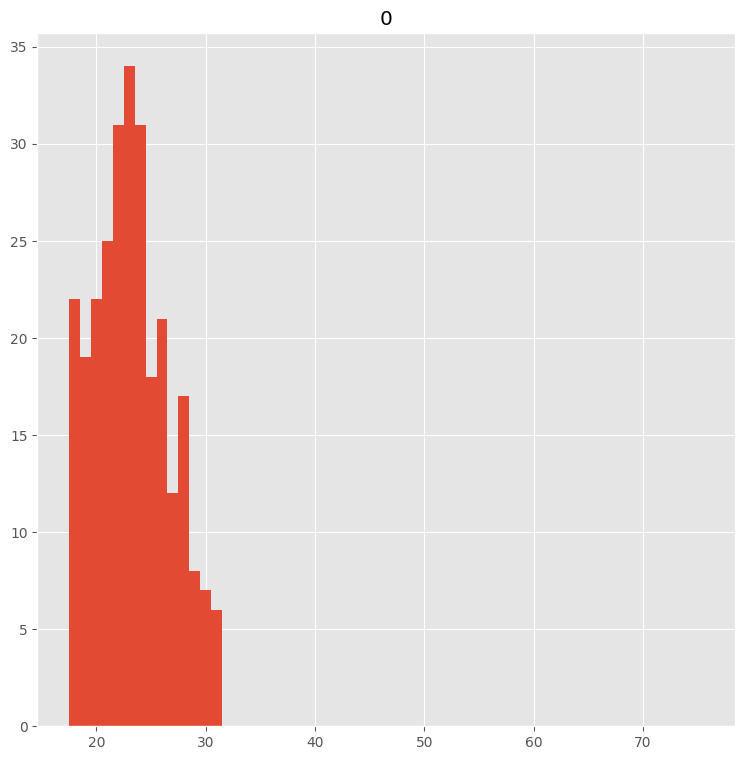

In [63]:
pd.DataFrame(population).hist(bins=58, range=(17.5,75.5), figsize=(9,9))
print(stats.skew(population));

nan


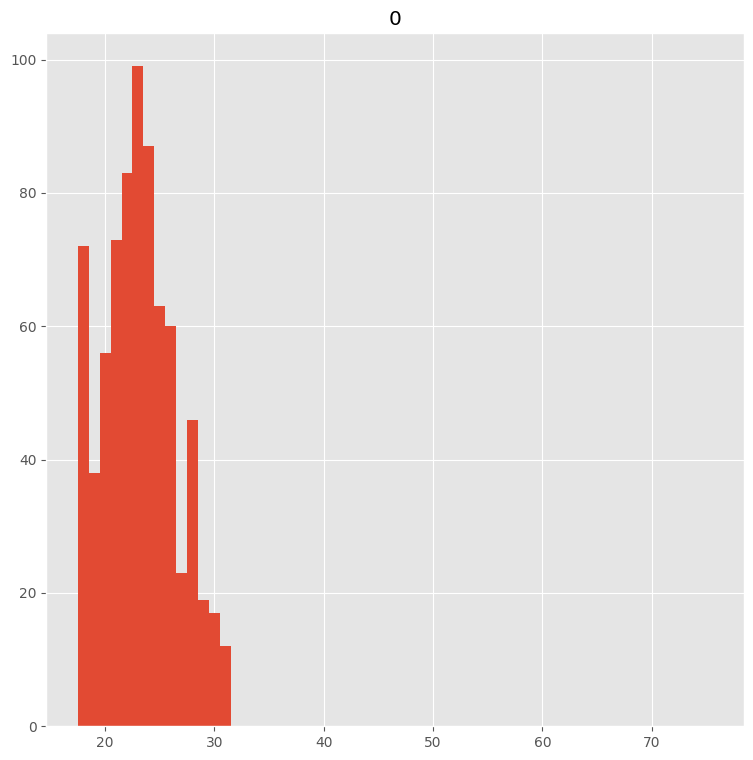

In [64]:
pd.DataFrame(sample).hist(bins=58, range=(17.5,75.5), figsize=(9,9));
print(stats.skew(sample))

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  565 non-null    int64  
 1   Week        552 non-null    object 
 2   Day         521 non-null    object 
 3   Date        534 non-null    object 
 4   Unnamed: 5  521 non-null    object 
 5   Opp         552 non-null    object 
 6   Tm          521 non-null    float64
 7   Opp.1       521 non-null    float64
 8   1stD        521 non-null    float64
 9   TotYd       521 non-null    float64
 10  PassY       521 non-null    float64
 11  RushY       521 non-null    float64
 12  TO          381 non-null    float64
 13  1stD.1      521 non-null    float64
 14  TotYd.1     521 non-null    float64
 15  PassY.1     521 non-null    float64
 16  RushY.1     521 non-null    float64
 17  TO.1        380 non-null    float64
 18  Offense     521 non-null    float64
 19  Defense     521 non-null    f

In [66]:
df.shape
df.describe()

,Unnamed: 0,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
count,565.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,381.000000,521.000000,521.000000,521.000000,521.000000,380.000000,521.000000,521.000000,521.000000
mean,282.000000,24.865643,24.861804,21.729367,360.424184,241.105566,119.318618,1.748031,21.786948,360.560461,241.721689,118.838772,1.763158,6.389002,-6.431382,0.067582
std,163.245725,9.912754,9.870707,5.063603,84.108301,78.554405,52.782447,0.942855,5.089460,83.907577,78.426872,52.972643,0.972829,12.176527,12.068656,5.365197
min,0.000000,0.000000,0.000000,6.000000,112.000000,12.000000,8.000000,1.000000,6.000000,108.000000,12.000000,8.000000,1.000000,-34.180000,-37.710000,-22.190000
25%,141.000000,18.000000,18.000000,18.000000,303.000000,186.000000,86.000000,1.000000,18.000000,304.000000,186.000000,86.000000,1.000000,-1.000000,-15.350000,-3.200000
50%,282.000000,25.000000,25.000000,22.000000,364.000000,241.000000,112.000000,1.000000,22.000000,365.000000,242.000000,111.000000,1.000000,7.050000,-6.960000,0.050000
75%,423.000000,31.000000,31.000000,25.000000,416.000000,294.000000,144.000000,2.000000,25.000000,415.000000,292.000000,144.000000,2.000000,15.290000,0.930000,3.350000
max,564.000000,56.000000,56.000000,36.000000,607.000000,501.000000,404.000000,5.000000,36.000000,607.000000,501.000000,404.000000,5.000000,37.710000,34.180000,22.190000


In [67]:
df.corr()

,Unnamed: 0,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Unnamed: 0,1.000000,0.064036,0.005707,-0.014601,0.031499,-0.044246,0.116043,-0.057498,0.048152,0.033949,0.021361,0.022149,-0.018734,0.082625,-0.049665,0.017183
Tm,0.064036,1.000000,-0.023244,0.587757,0.636276,0.468603,0.316492,-0.234562,0.098195,0.069578,0.226654,-0.225355,0.271693,0.795503,0.073466,-0.083998
Opp.1,0.005707,-0.023244,1.000000,0.093747,0.063229,0.219949,-0.226587,0.282139,0.577447,0.623473,0.453482,0.316181,-0.238763,-0.081560,-0.788437,0.073116
1stD,-0.014601,0.587757,0.093747,1.000000,0.809117,0.647419,0.325787,-0.064363,-0.018435,-0.020522,0.064022,-0.127292,-0.022215,0.700354,-0.143239,-0.321992
TotYd,0.031499,0.636276,0.063229,0.809117,1.000000,0.791501,0.415525,-0.062275,-0.025553,-0.007382,0.112434,-0.178154,0.001472,0.717679,-0.081533,-0.339929
PassY,-0.044246,0.468603,0.219949,0.647419,0.791501,1.000000,-0.227019,0.055384,0.053607,0.103247,0.168287,-0.085610,-0.020098,0.512597,-0.190737,-0.250942
RushY,0.116043,0.316492,-0.226587,0.325787,0.415525,-0.227019,1.000000,-0.188070,-0.120500,-0.165423,-0.071294,-0.156475,0.030953,0.380733,0.153946,-0.168204
TO,-0.057498,-0.234562,0.282139,-0.064363,-0.062275,0.055384,-0.188070,1.000000,-0.026993,0.006083,-0.005160,0.016575,-0.088842,-0.425455,-0.021742,0.073185
1stD.1,0.048152,0.098195,0.577447,-0.018435,-0.025553,0.053607,-0.120500,-0.026993,1.000000,0.809028,0.647930,0.322213,-0.075800,0.152809,-0.706027,0.325074
TotYd.1,0.033949,0.069578,0.623473,-0.020522,-0.007382,0.103247,-0.165423,0.006083,0.809028,1.000000,0.789072,0.415745,-0.049943,0.093835,-0.722383,0.342304


In [68]:
df.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(pd.DataFrame(df['1stD']),df['RushY']) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Unnamed: 0,Week,Day,Date,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,...,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Sklearn_theta
3,3,4,Sun,4-Oct,L,Philadelphia Eagles,20.0,25.0,25.0,417.0,...,18.0,267.0,174.0,93.0,1.0,0.02,-0.66,-3.75,San Francisco 49ers,NaN
6,6,7,Sun,25-Oct,W,New England Patriots,33.0,6.0,26.0,467.0,...,17.0,241.0,147.0,94.0,4.0,22.44,9.49,-6.55,San Francisco 49ers,NaN
9,9,10,Sun,15-Nov,L,New Orleans Saints,13.0,27.0,21.0,281.0,...,17.0,237.0,123.0,114.0,2.0,-8.03,2.66,-6.47,San Francisco 49ers,NaN
11,11,12,Sun,29-Nov,W,Los Angeles Rams,23.0,20.0,18.0,345.0,...,14.0,308.0,182.0,126.0,4.0,-14.81,19.57,-2.68,San Francisco 49ers,NaN
12,12,13,Mon,7-Dec,L,Buffalo Bills,24.0,34.0,24.0,402.0,...,31.0,449.0,368.0,81.0,1.0,6.59,-18.14,-0.36,San Francisco 49ers,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,557,10,Mon,16-Nov,W,Chicago Bears,19.0,13.0,19.0,385.0,...,10.0,149.0,108.0,41.0,2.0,-3.86,18.69,-8.08,Minnesota Vikings,NaN
558,558,11,Sun,22-Nov,L,Dallas Cowboys,28.0,31.0,24.0,430.0,...,24.0,376.0,196.0,180.0,1.0,9.00,-15.61,2.73,Minnesota Vikings,NaN
559,559,12,Sun,29-Nov,W,Carolina Panthers,28.0,27.0,26.0,387.0,...,21.0,374.0,267.0,107.0,1.0,0.99,-7.73,7.86,Minnesota Vikings,NaN
560,560,13,Sun,6-Dec,W,Jacksonville Jaguars,27.0,24.0,30.0,420.0,...,20.0,390.0,266.0,124.0,4.0,-2.36,4.24,3.19,Minnesota Vikings,NaN


#Model Building

In [ ]:
One of the great perks of Python is that you can build solutions for real-life problems. This applies in almost every industry.
From building models to predict diseases to building web apps that can forecast the future sales of your online store, 
knowing how to code enables you to think outside of the box and broadens your professional horizons as a data scientist.

Whether you’ve just learned the Python basics or already have significant knowledge of the programming language, 
knowing your way around predictive programming and learning how to build a model is essential for machine learning. 
In this practical tutorial, we’ll learn together how to build a binary logistic regression in 5 quick steps.

In [29]:
pip install -U scikit-learn

     ---------------------------------------- 7.5/7.5 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [33]:
df=pd.read_csv(r"C:\Users\ACER\Downloads\2020_NFL_COMBINE.csv")
newdf=df[df['Home_team'] == "Buffalo Bills"]

newdf.head()

,Unnamed: 0,Week,Day,Date,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,...,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
112,112,1,Sun,13-Sep,W,New York Jets,27.0,17.0,31.0,404.0,...,2.0,15.0,254.0,202.0,52.0,2.0,14.47,0.12,-3.63,Buffalo Bills
113,113,2,Sun,20-Sep,W,Miami Dolphins,31.0,28.0,23.0,523.0,...,1.0,28.0,410.0,311.0,99.0,NaN,21.16,-12.70,-2.30,Buffalo Bills
114,114,3,Sun,27-Sep,W,Los Angeles Rams,35.0,32.0,23.0,375.0,...,2.0,28.0,478.0,311.0,167.0,2.0,17.83,-19.86,6.79,Buffalo Bills
115,115,4,Sun,4-Oct,W,Las Vegas Raiders,30.0,23.0,21.0,337.0,...,NaN,24.0,383.0,297.0,86.0,2.0,16.49,-7.20,-1.37,Buffalo Bills
116,116,5,Tue,13-Oct,L,Tennessee Titans,16.0,42.0,23.0,370.0,...,3.0,25.0,334.0,195.0,139.0,NaN,1.55,-24.29,-0.82,Buffalo Bills


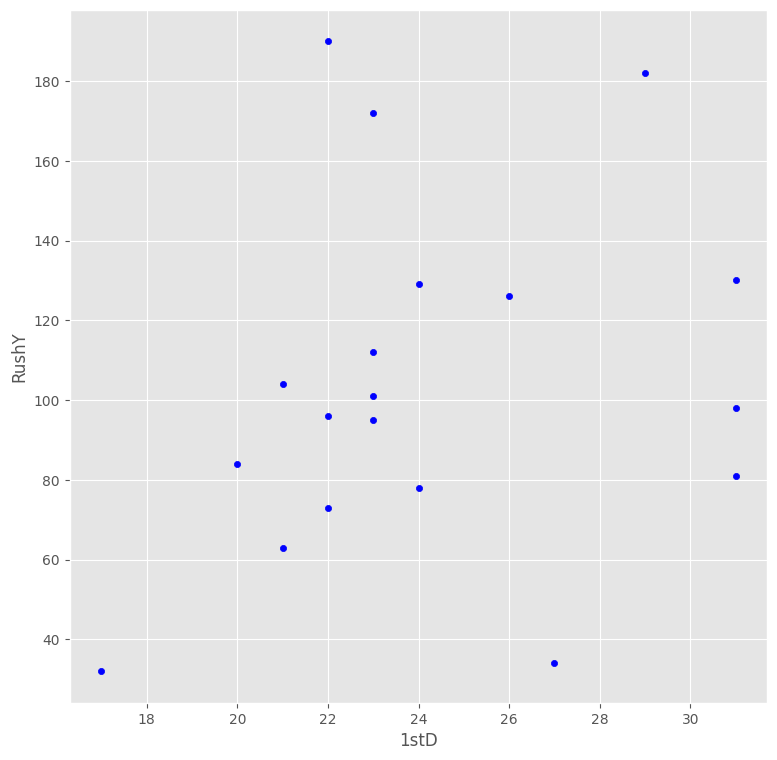

In [34]:
newdf.plot(kind="scatter",
            x='1stD', 
            y='RushY',
            figsize=(9,9),
           color="blue");